In [84]:
from pathlib import Path
from collections import defaultdict
import json
import pandas as pd
from datetime import datetime, timedelta
from pytz import utc

%matplotlib notebook

In [80]:
stats = []
only_after = datetime.now().astimezone(utc) - timedelta(days=365 * 10)
for stats_file in Path('github.com').glob("*/*/[0-9T:+-]*.json"):
    with open(stats_file) as opened_stats_file:
        current_dict = json.load(opened_stats_file)
        current_dict['datetime'] = datetime.strptime(stats_file.name.split('.json')[0], '%Y-%m-%dT%H:%M:%S%z').astimezone(utc)
        current_dict.update({"has_dir:" + key: int(value) for key, value in current_dict['has_dir'].items()})
        del current_dict['has_dir']
        current_dict.update({"has_file:" + key: int(value) for key, value in current_dict['has_file'].items()})
        del current_dict['has_file']
        current_dict.update({"lines_of_" + key: int(value) for key, value in current_dict['lines_of_code'].items()})
        del current_dict['lines_of_code']
        if current_dict['datetime'] > only_after:
            stats.append(current_dict)
stats = pd.DataFrame(stats)
stats.set_index(pd.DatetimeIndex(stats['datetime']), inplace=True)

In [81]:
rst_or_md = stats[(stats['has_file:README.rst'] == 1) | (stats['has_file:README.md'] == 1)]

<IPython.core.display.Javascript object>


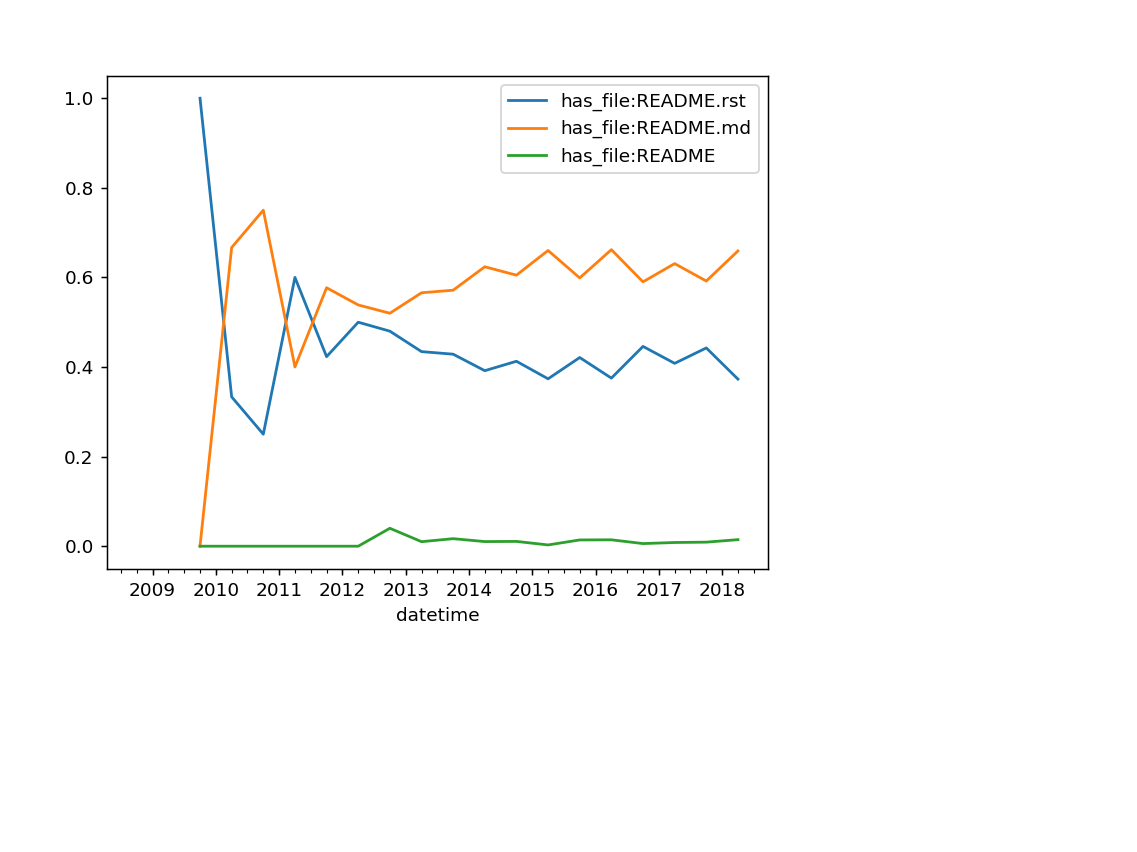

In [99]:
readmes = rst_or_md.resample("6M")['has_file:README.rst', 'has_file:README.md', 'has_file:README'].mean().plot()

<IPython.core.display.Javascript object>


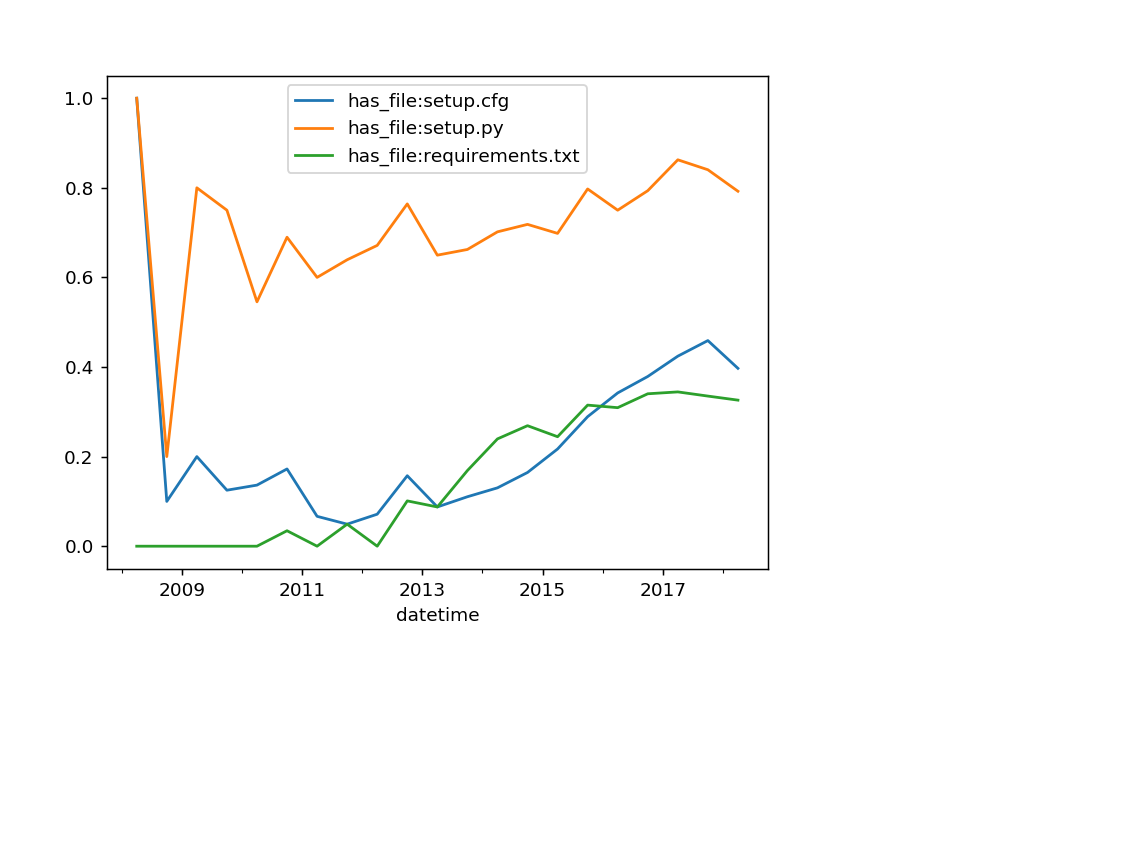

In [100]:
setups = stats.resample("6M")['has_file:setup.cfg', 'has_file:setup.py', 'has_file:requirements.txt'].mean().plot()

<IPython.core.display.Javascript object>


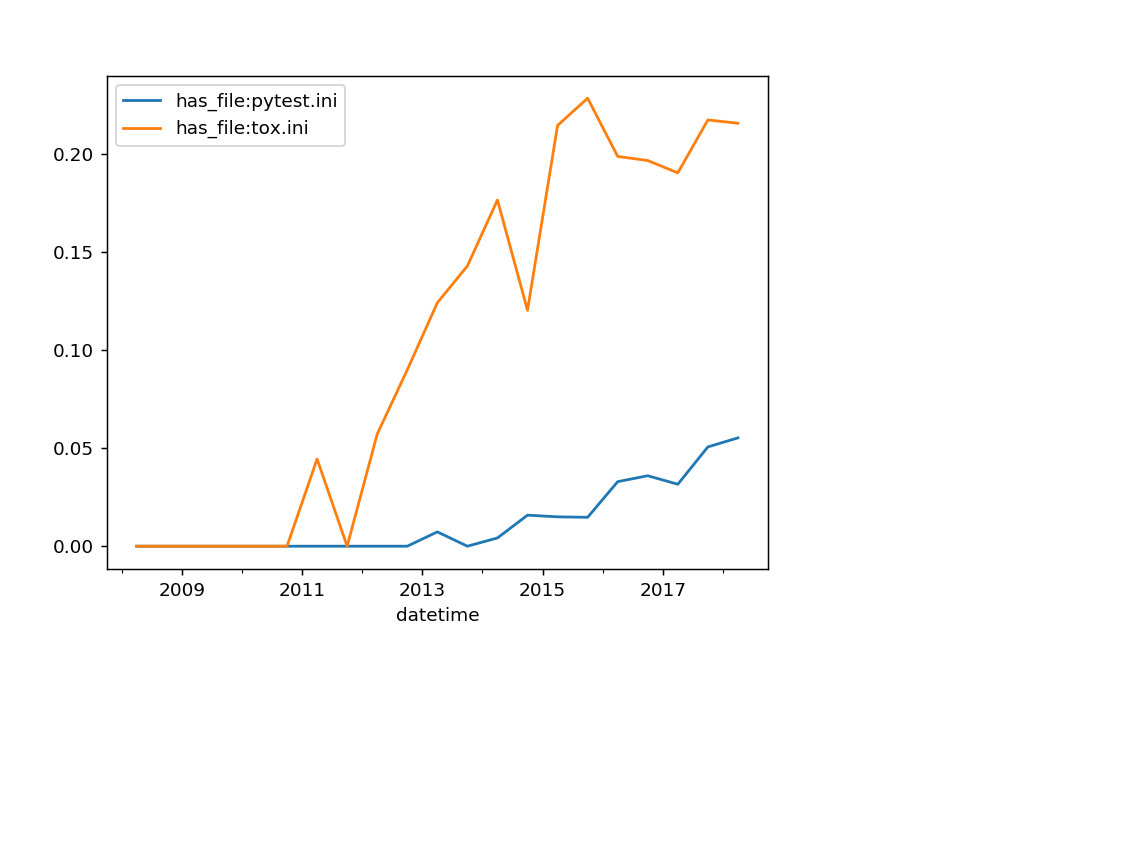

In [101]:
tests = stats.resample("6M")['has_file:pytest.ini', 'has_file:tox.ini'].mean().plot()

<IPython.core.display.Javascript object>


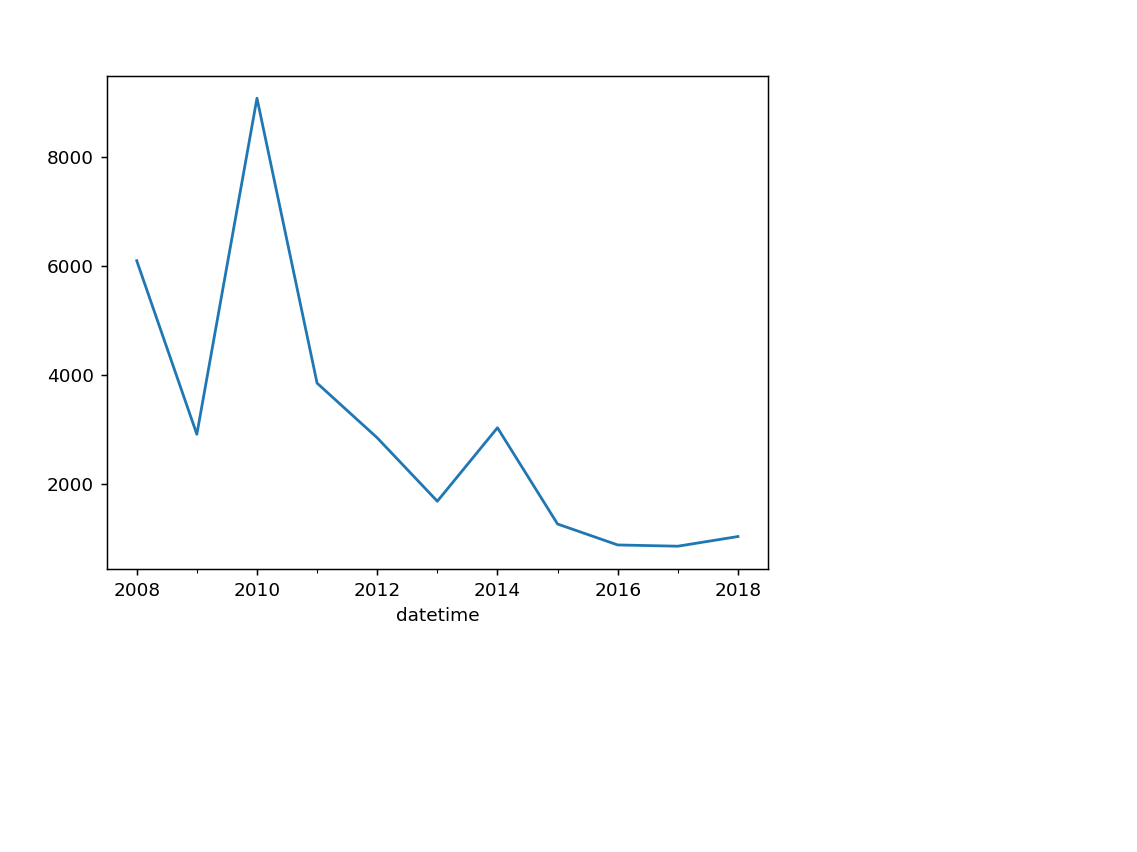

In [102]:
pep8 = stats.resample("1Y")['pep8_infringement'].mean().plot()